<a href="https://colab.research.google.com/github/complex224aayush/explaination__all/blob/main/Resnet50_and_Inceptipn_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Link -


*   https://www.kaggle.com/datasets/samuelcortinhas/sports-balls-multiclass-image-classification/data



# Connecting Kaggle json

In [ ]:
!mkdir -p ./kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot create regular file '/root/.kaggle/': Not a directory


# Getting the DataSet

In [ ]:
!kaggle datasets download -d samuelcortinhas/sports-balls-multiclass-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/sports-balls-multiclass-image-classification
License(s): CC0-1.0
 99% 399M/401M [00:13<00:00, 36.7MB/s]
100% 401M/401M [00:13<00:00, 30.2MB/s]


# Unzipping the data

In [ ]:
!unzip /content/sports-balls-multiclass-image-classification.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/train/cricket_ball/cricket_ball_182.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_183.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_185.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_186.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_187.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_189.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_19.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_190.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_191.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_192.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_195.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_196.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_199.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_200.jpg  
  inflating: /content/train/cricket_ball/cricket_ball_

# Importing Packages

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Rescaling

import tensorflow as tf
import os


# For reproducibility
import numpy as np
import random
import os
import glob
import matplotlib.pyplot as plt
import seaborn as sns

seed = 123
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

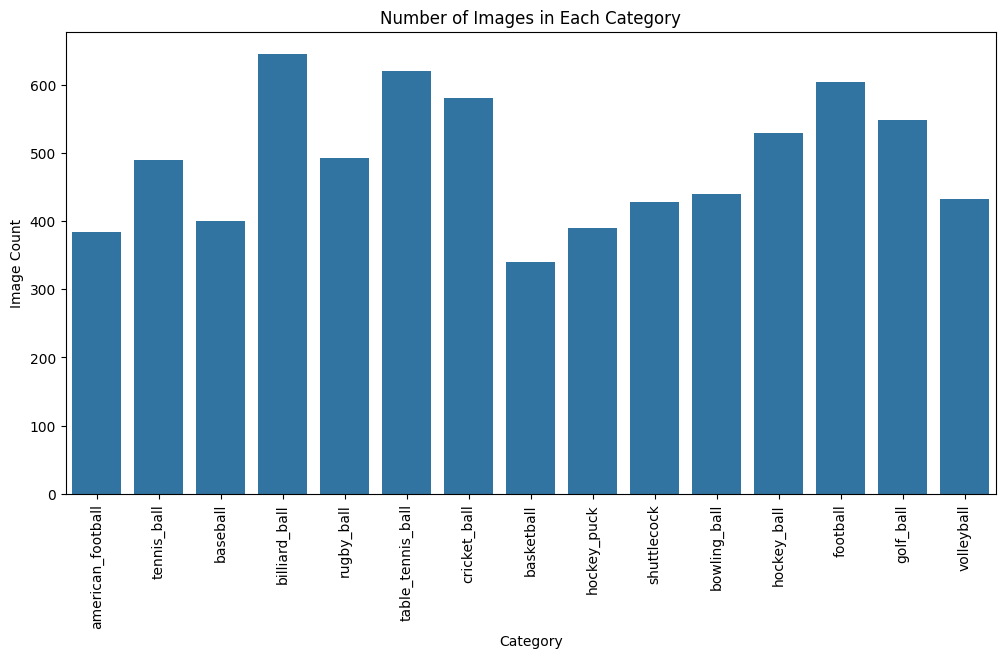

In [ ]:
import os
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Directory path (update with the correct path to your 'train' directory)
train_dir = '/content/train'

# Dictionary to store subdirectory names and file counts
data = {'Category': [], 'Image Count': []}

# Loop through each subdirectory
for sub_dir in os.listdir(train_dir):
    sub_dir_path = os.path.join(train_dir, sub_dir)
    if os.path.isdir(sub_dir_path):
        # Count the number of files (images) in the subdirectory
        num_files = len([f for f in os.listdir(sub_dir_path) if os.path.isfile(os.path.join(sub_dir_path, f))])
        data['Category'].append(sub_dir)
        data['Image Count'].append(num_files)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Create the bar plot using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Image Count', data=df)
plt.xticks(rotation=90)
plt.title('Number of Images in Each Category')
plt.ylabel('Image Count')
plt.xlabel('Category')
plt.show()

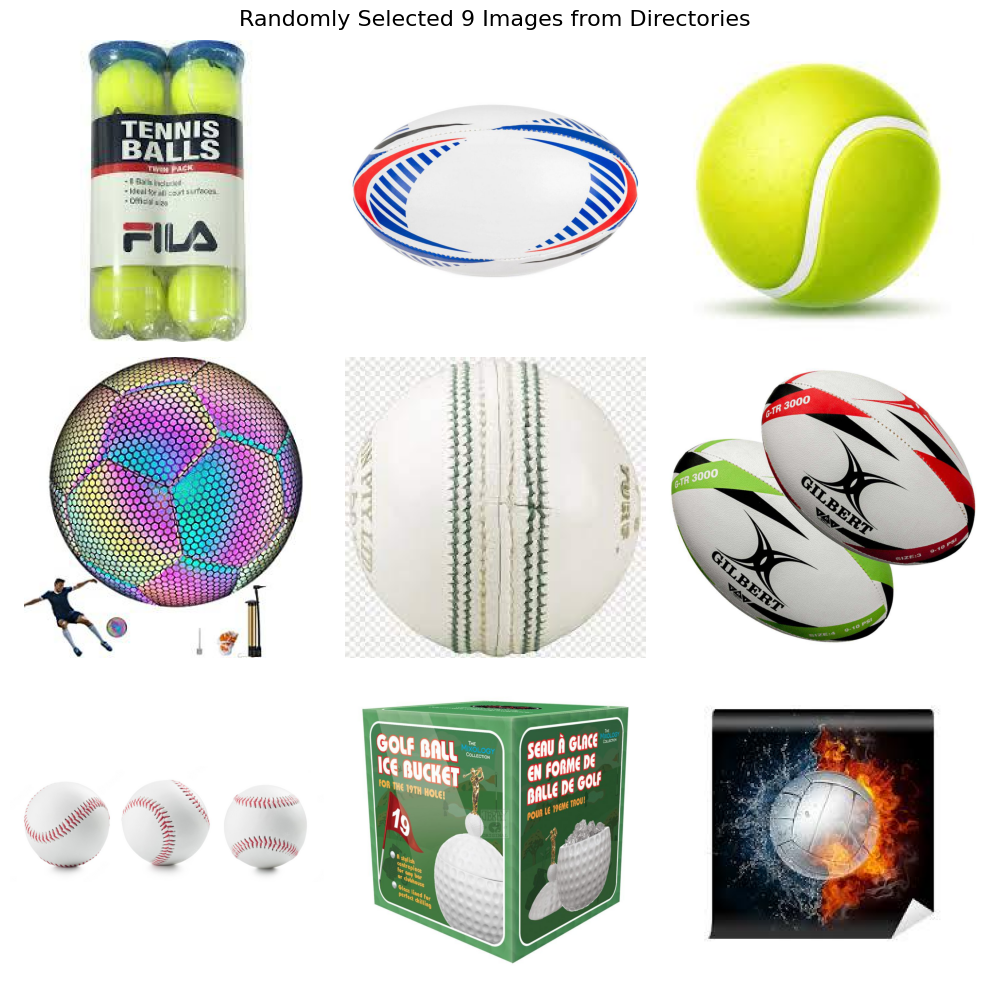

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Directory path (update with the correct path to your 'train' directory)
train_dir = '/content/train'

# Get all subdirectories and files in the directories
all_images = []
for sub_dir in os.listdir(train_dir):
    sub_dir_path = os.path.join(train_dir, sub_dir)
    if os.path.isdir(sub_dir_path):
        all_images.extend([os.path.join(sub_dir_path, f) for f in os.listdir(sub_dir_path) if os.path.isfile(os.path.join(sub_dir_path, f))])

# Randomly select 9 images
random_images = random.sample(all_images, 9)

# Plotting the images in a 3x3 grid
plt.figure(figsize=(10, 10))
for i, image_path in enumerate(random_images):
    img = mpimg.imread(image_path)
    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.axis('off')  # Turn off the axis

plt.suptitle('Randomly Selected 9 Images from Directories', fontsize=16)
plt.tight_layout()
plt.show()


# Data Preparation

In [ ]:
# Set up directory and parameters
train_dir = '/content/train'
img_size = (224, 224)  # ResNet50 standard input size
batch_size = 32  # Adjust batch size as per your GPU capacity

In [ ]:
# Data Augmentation layers (applied during training)
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),  # Random horizontal flip
    layers.RandomRotation(0.1),  # Random rotation
    layers.RandomZoom(0.1),  # Random zoom
])

# Flow from direcotory.

In [ ]:
# Load training and validation datasets using image_dataset_from_directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels = 'inferred',
    label_mode = 'categorical',
    validation_split=0.2,  # 80/20 split for training/validation
    subset="training",
    seed=123,  # For reproducibility
    image_size=img_size,
    batch_size=batch_size
)

Found 7328 files belonging to 15 classes.
Using 5863 files for training.


In [ ]:
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    labels = 'inferred',
    label_mode = 'categorical',
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

Found 7328 files belonging to 15 classes.
Using 1465 files for validation.


In [ ]:
# Apply data augmentation only to the training data
train_dataset = train_dataset.map(lambda x, y: (data_augmentation(x, training=True), y))

In [ ]:
# Optional: Prefetch data for performance improvement
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

# Model Buidling

In [ ]:
model = sequeantial ()


model.add(conv2d)
model.add(activation)
model.add(conv2d)
model.add(activaiton)...


model.summary()


x =. sequntial()

x = cov2d()(x)
x = activation()(x)

In [ ]:
def residual_block(x, filters, kernel_size=3, stride=1):
    shortcut = x

    # First 1x1 Convolution to reduce dimensions
    x = layers.Conv2D(filters, kernel_size=1, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Second 3x3 Convolution
    x = layers.Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    # Third 1x1 Convolution to restore dimensions
    x = layers.Conv2D(filters * 4, kernel_size=1, strides=1, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Shortcut connection (adjust dimensions if necessary)
    if stride != 1 or shortcut.shape[-1] != filters * 4:
        shortcut = layers.Conv2D(filters * 4, kernel_size=1, strides=stride, padding='same')(shortcut)
        shortcut = layers.BatchNormalization()(shortcut)

    # Add the shortcut
    x = layers.Add()([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

In [ ]:
def build_resnet50(input_shape=(224, 224, 3), num_classes=15):
    inputs = tf.keras.Input(shape=input_shape)

    # x = layers.rescaling(1/255.)
    # Initial Convolution and MaxPooling
    x = layers.Conv2D(64, kernel_size=7, strides=2, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D(pool_size=3, strides=2, padding='same')(x)

    # Residual Blocks (Bottleneck Architecture)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)
    x = residual_block(x, filters=64)

    x = residual_block(x, filters=128, stride=2)
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=128)
    x = residual_block(x, filters=128)

    x = residual_block(x, filters=256, stride=2)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)
    x = residual_block(x, filters=256)

    x = residual_block(x, filters=512, stride=2)
    x = residual_block(x, filters=512)
    x = residual_block(x, filters=512)

    # Global Average Pooling and Output
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, x)
    return model

In [ ]:
# Build the model
model = build_resnet50(input_shape=(224, 224, 3))
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_53 (Conv2D)        │ (None, 112, 112, 64)   │          9,472 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_53    │ (None, 112, 112, 64)   │            256 │ conv2d_53[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_49             │ (None, 112, 112, 64)   │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 56, 56, 64)     │              0 │ activation_49[0][0]    │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_54 (Conv2D)        │ (None, 56, 56, 64)     │          4,160 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_54    │ (None, 56, 56, 64)     │            256 │ conv2d_54[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_50             │ (None, 56, 56, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 56, 56, 64)     │         36,928 │ activation_50[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_55    │ (None, 56, 56, 64)     │            256 │ conv2d_55[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_51             │ (None, 56, 56, 64)     │              0 │ batch_normalization_5… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_56 (Conv2D)        │ (None, 56, 56, 256)    │         16,640 │ activation_51[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_57 (Conv2D)        │ (None, 56, 56, 256)    │         16,640 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_56    │ (None, 56, 56, 256)    │          1,024 │ conv2d_56[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_57    │ (None, 56, 56, 256)    │          1,024 │ conv2d_57[0][0]        │
│ (BatchNormalization) 

 Total params: 23,618,447 (90.10 MB)

 Trainable params: 23,565,327 (89.89 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5  # Adjust epochs as needed
)

Epoch 1/5
 23/184 ━━━━━━━━━━━━━━━━━━━━ 1:30 563ms/step - accuracy: 0.0969 - loss: 4.3747

KeyboardInterrupt: 

# Pretrained model and fine tuning

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Set up directory and parameters
train_dir = '/content/train'
img_size = (224, 224)
batch_size = 32
num_classes = 15  # Update this with the actual number of classes in your dataset

# Load the pre-trained ResNet50 model excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # Pretrained on imagedataset

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
base_model.summary()

Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 23,534,592 (89.78 MB)

 Non-trainable params: 53,120 (207.50 KB)

In [ ]:
# Freeze the base model layers
base_model.trainable = False

# Create a new model on top of the pre-trained base model
inputs = tf.keras.Input(shape=(224, 224, 3))

# Normalization layer
x = layers.Rescaling(1./255)(inputs)

# Optional: Apply augmentation (if augmentation is needed)
# x = layers.RandomFlip('horizontal')(x)
# x = layers.RandomRotation(0.1)(x)
# x = layers.RandomZoom(0.1)(x)

# Pass the inputs through the pre-trained ResNet50 base model
x = base_model(x, training=False)

# Global average pooling to reduce the output to a single vector per image
x = layers.GlobalAveragePooling2D()(x)

# Add a fully connected layer with the number of classes
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)  # Dropout to reduce overfitting

# Final output layer with softmax activation for classification
outputs = layers.Dense(num_classes, activation='softmax')(x)

# Build the model
model = models.Model(inputs, outputs)

model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 24,116,111 (92.00 MB)

 Trainable params: 528,399 (2.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Load training and validation datasets using image_dataset_from_directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Prefetch data for performance improvement
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

# Train the new layers while keeping the base model frozen
history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5  # Adjust epochs as needed
)

Found 7328 files belonging to 15 classes.
Using 5863 files for training.
Found 7328 files belonging to 15 classes.
Using 1465 files for validation.
Epoch 1/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 45s 179ms/step - accuracy: 0.0931 - loss: 2.7716 - val_accuracy: 0.1509 - val_loss: 2.6193
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 25s 132ms/step - accuracy: 0.1166 - loss: 2.6378 - val_accuracy: 0.1782 - val_loss: 2.5829
Epoch 3/5


KeyboardInterrupt: 

# Layers fine tuning

In [ ]:
# Load the pre-trained ResNet50 model excluding the top layers
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)) # Pretrained on imagedataset

# Unfreeze the last few layers of the base model for fine-tuning
base_model.trainable = True

# Let's set up how many layers we want to fine-tune
# For example, we can choose to fine-tune the last 10 layers of the base model
fine_tune_at = 140  # Unfreeze from this layer onwards

# Freeze all layers before `fine_tune_at`
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

In [ ]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_4           │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 15)                  │           3,855 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,172,911 (96.03 MB)

 Trainable params: 528,399 (2.02 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

 Optimizer params: 1,056,800 (4.03 MB)

In [ ]:

# Compile the model again after unfreezing layers (lower learning rate for fine-tuning)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fine-tune the model
fine_tune_history = model.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=5  # Increase epochs for fine-tuning
)


Epoch 1/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 39s 159ms/step - accuracy: 0.1288 - loss: 2.6085 - val_accuracy: 0.1925 - val_loss: 2.5755
Epoch 2/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 21s 112ms/step - accuracy: 0.1455 - loss: 2.5864 - val_accuracy: 0.1939 - val_loss: 2.5704
Epoch 3/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 22s 119ms/step - accuracy: 0.1441 - loss: 2.5906 - val_accuracy: 0.1980 - val_loss: 2.5664
Epoch 4/5
184/184 ━━━━━━━━━━━━━━━━━━━━ 42s 122ms/step - accuracy: 0.1477 - loss: 2.5899 - val_accuracy: 0.1980 - val_loss: 2.5629
Epoch 5/5


# Assignment



*   Complete this code to train for larger epochs
*   Do the performnce plots and evaulation and confusion matrix
*   Do the whole thing for the inception model



# Inception Model from scratch

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Inception module as defined in the paper
def inception_module(x, filters_1x1, filters_3x3_reduce, filters_3x3, filters_5x5_reduce, filters_5x5, filters_pool_proj):
    # 1x1 convolution
    conv_1x1 = layers.Conv2D(filters_1x1, (1, 1), padding='same', activation='relu')(x)

    # 3x3 convolution
    conv_3x3 = layers.Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_3x3 = layers.Conv2D(filters_3x3, (3, 3), padding='same', activation='relu')(conv_3x3)

    # 5x5 convolution
    conv_5x5 = layers.Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu')(x)
    conv_5x5 = layers.Conv2D(filters_5x5, (5, 5), padding='same', activation='relu')(conv_5x5)

    # Max pooling followed by 1x1 convolution
    pool_proj = layers.MaxPooling2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = layers.Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu')(pool_proj)

    # Concatenate filters from all branches
    output = layers.concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=-1)
    return output

In [ ]:
# Auxiliary classifier for training (deep supervision)
def auxiliary_classifier(x, num_classes):
    aux = layers.AveragePooling2D((5, 5), strides=(3, 3))(x)
    aux = layers.Conv2D(128, (1, 1), padding='same', activation='relu')(aux)
    aux = layers.Flatten()(aux)
    aux = layers.Dense(1024, activation='relu')(aux)
    aux = layers.Dropout(0.7)(aux)
    aux = layers.Dense(num_classes, activation='softmax')(aux)
    return aux

In [ ]:
# Build the GoogLeNet model with two auxiliary classifiers
def build_googlenet(input_shape, num_classes):
    input_layer = layers.Input(shape=input_shape)
    # Normalization layer
    x = layers.Rescaling(1./255)(input_layer)

    # Initial Convolution and MaxPooling
    x = layers.Conv2D(64, (7, 7), strides=(2, 2), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # Add batch normalisaiton layer

    # Second Convolution and MaxPooling
    x = layers.Conv2D(192, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)



    # Inception modules 1 to 4
    x = inception_module(x, 64, 96, 128, 16, 32, 32)  # Inception 3a
    x = inception_module(x, 128, 128, 192, 32, 96, 64)  # Inception 3b

    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)  # MaxPooling after 3b

    x = inception_module(x, 192, 96, 208, 16, 48, 64)  # Inception 4a

    # First auxiliary classifier after the 4th inception module
    aux1 = auxiliary_classifier(x, num_classes)

    x = inception_module(x, 160, 112, 224, 24, 64, 64)  # Inception 4b
    x = inception_module(x, 128, 128, 256, 24, 64, 64)  # Inception 4c
    x = inception_module(x, 112, 144, 288, 32, 64, 64)  # Inception 4d

    # Second auxiliary classifier after the 7th inception module
    aux2 = auxiliary_classifier(x, num_classes)

    x = inception_module(x, 256, 160, 320, 32, 128, 128)  # Inception 4e

    x = layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)  # MaxPooling after 4e

    # Inception modules 8 and 9
    x = inception_module(x, 256, 160, 320, 32, 128, 128)  # Inception 5a
    x = inception_module(x, 384, 192, 384, 48, 128, 128)  # Inception 5b

    # Global Average Pooling and Dropout
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.4)(x)

    # Final output layer (main classifier)
    output_layer = layers.Dense(num_classes, activation='softmax')(x)

    # Define the model with inputs and three outputs (main + 2 auxiliary)
    model = models.Model(inputs=input_layer, outputs=[output_layer, aux1, aux2])
    return model



In [ ]:
# Model parameters
input_shape = (224, 224, 3)  # ImageNet image size
num_classes = 15  # Number of classes for classification

# Build the model
googlenet = build_googlenet(input_shape, num_classes)

googlenet.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 224, 224, 3)    │              0 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 112, 112, 64)   │          9,472 │ rescaling[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_13          │ (None, 56, 56, 64)     │              0 │ conv2d_58[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 56, 56, 192)    │        110,784 │ max_pooling2d_13[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_14          │ (None, 28, 28, 192)    │              0 │ conv2d_59[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_61 (Conv2D)        │ (None, 28, 28, 96)     │         18,528 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_63 (Conv2D)        │ (None, 28, 28, 16)     │          3,088 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_15          │ (None, 28, 28, 192)    │              0 │ max_pooling2d_14[0][0] │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_60 (Conv2D)        │ (None, 28, 28, 64)     │         12,352 │ max_pooling2d_14[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_62 (Conv2D)        │ (None, 28, 28, 128)    │        110,720 │ conv2d_61[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_64 (Conv2D)        │ (None, 28, 28, 32)     │         12,832 │ conv2d_63[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_65 (Conv2D)        │ (None, 28, 28, 32)     │          6,176 │ max_pooling2d_15[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_9             │ (None, 28, 28, 256)    │              0 │ conv2d_60[0][0],       │
│ (Concatenate)             │                        │                │ conv2d_62[0][0],       │
│                           │                        │                │ conv2d_64[0][0],       │
│                           │                        │                │ conv2d_65[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_67 (Conv2D)        │ (None, 28, 28, 128)    │         32,896 │ concatenate_9[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_69 (Conv2D)        │ (None, 28, 28, 32)     │          8,224 │ concatenate_9[0][0]    │
├──────────────────────

 Total params: 10,345,245 (39.46 MB)

 Trainable params: 10,345,245 (39.46 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models

# Set up directory and parameters
train_dir = '/content/train'
img_size = (224, 224)
batch_size = 32
num_classes = 15

# Load training and validation datasets using image_dataset_from_directory
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

train_dir = "/content/train"

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=img_size,
    batch_size=batch_size
)

# Prefetch data for performance improvement
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
validation_dataset = validation_dataset.prefetch(buffer_size=AUTOTUNE)

Found 7328 files belonging to 15 classes.
Using 5863 files for training.
Found 7328 files belonging to 15 classes.
Using 1465 files for validation.


In [ ]:
# Compile the model again after unfreezing layers (lower learning rate for fine-tuning)
googlenet.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),  # Lower learning rate for fine-tuning
              loss=['sparse_categorical_crossentropy', 'sparse_categorical_crossentropy','sparse_categorical_crossentropy'],
              metrics=['accuracy', 'accuracy', 'accuracy'])

In [ ]:
# Train the new layers while keeping the base model frozen
history = googlenet.fit(
    train_dataset,
    validation_data=validation_dataset,
    epochs=2  # Adjust epochs as needed
)

Epoch 1/2


/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:664: UserWarning: Gradients do not exist for variables ['kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias', 'kernel', 'bias'] when minimizing the loss. If using `model.compile()`, did you forget to provide a `loss` argument?
  warnings.warn(


184/184 ━━━━━━━━━━━━━━━━━━━━ 95s 318ms/step - dense_9_accuracy: 0.0756 - loss: 2.7049 - val_dense_9_accuracy: 0.0846 - val_loss: 2.6872
Epoch 2/2
184/184 ━━━━━━━━━━━━━━━━━━━━ 25s 131ms/step - dense_9_accuracy: 0.0897 - loss: 2.6933 - val_dense_9_accuracy: 0.1270 - val_loss: 2.6769


In [ ]:
# Model summary
googlenet.summary()
